# Data Analysis on the Brazilian E-Commerce Public Dataset by Olist
Author : Kelompok 18-D [Arif Widagdo, Jonatan Jeremi, Muhammad Idz, Wandi Wardiman]

Description : This notebook is our first assignment at SIB E-Commerce to take the first step in implementing data cleaning, data integration and data visualization

Outline :
1. Data Cleaning
2. Data Integration
3. Visualisasi Data

## Import Library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats 
import os
import matplotlib.pyplot as plt
import folium

## Data Extraction

In [2]:
## read list dataset in directory data
os.listdir("../data")

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

In [3]:
## check empty value
missing_values = ["?","N/a","na",np.nan]
## read dataset
olist_customers = pd.read_csv("../data/olist_customers_dataset.csv" , na_values = missing_values)
olist_geolocation = pd.read_csv("../data/olist_geolocation_dataset.csv" , na_values = missing_values)
olist_order_items = pd.read_csv("../data/olist_order_items_dataset.csv" , na_values = missing_values)
olist_order_payments = pd.read_csv("../data/olist_order_payments_dataset.csv" , na_values = missing_values)
olist_order_reviews = pd.read_csv("../data/olist_order_reviews_dataset.csv" , na_values = missing_values)
olist_orders = pd.read_csv("../data/olist_orders_dataset.csv" , na_values = missing_values)
olist_products = pd.read_csv("../data/olist_products_dataset.csv" , na_values = missing_values)
olist_sellers = pd.read_csv("../data/olist_sellers_dataset.csv" , na_values = missing_values)
product_category_name_translation= pd.read_csv("../data/product_category_name_translation.csv" , na_values = missing_values)

## 1. Data Cleaning

### - olist_customers_dataset

In [4]:
olist_customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


### - olist_geolocation_dataset

In [5]:
olist_geolocation.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


### - olist_order_items_dataset

In [6]:
olist_order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


### - olist_order_payments_dataset

In [7]:
olist_order_payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


### - olist_order_reviews_dataset

In [8]:
olist_order_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


#### check empty value in olist_order_reviews_dataset

In [9]:
olist_order_reviews.shape

(99224, 7)

In [10]:
olist_order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87657
review_comment_message     58251
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [11]:
olist_order_reviews.isnull().any()

review_id                  False
order_id                   False
review_score               False
review_comment_title        True
review_comment_message      True
review_creation_date       False
review_answer_timestamp    False
dtype: bool

<AxesSubplot:>

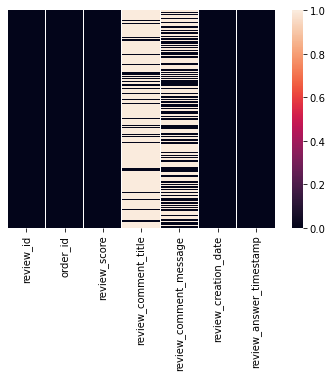

In [12]:
sns.heatmap(olist_order_reviews.isnull(), yticklabels=False)

#### solution

In [13]:
## remove review_comment_title column & review_comment_message column 
olist_order_reviews = olist_order_reviews.drop(['review_comment_title'], axis=1)
olist_order_reviews = olist_order_reviews.drop(['review_comment_message'], axis=1)
olist_order_reviews.head(2)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13


In [14]:
olist_order_reviews.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

### - olist_orders_dataset

In [15]:
olist_orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


#### check empty value in olist_orders_dataset

In [16]:
olist_orders.shape

(99441, 8)

In [17]:
olist_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [18]:
olist_orders.isnull().any()

order_id                         False
customer_id                      False
order_status                     False
order_purchase_timestamp         False
order_approved_at                 True
order_delivered_carrier_date      True
order_delivered_customer_date     True
order_estimated_delivery_date    False
dtype: bool

#### solution

In [19]:
## if all the columns do not contain values then use the following source code :
## olist_orders2 = olist_orders.dropna(how='all')

## else if only some values are missing in the column and you don't want to delete those rows, 
## you can use the following source code: 
## olist_orders2 = olist_orders.fillna(0)

## else if only some values are missing in the column and you want to fill those data with the values in the previous row (duplicates), 
## you can use the following source code :
## olist_orders2 = olist_orders.fillna(method='ffill')

## else if only some values are missing in the column and you want to fill those data with the values in the next row (duplicates), 
## you can use the following source code :
## olist_products2 = olist_products.fillna(method='bfill')

## you can use the following source code :
## olist_products2 = olist_products.interpolate()


olist_orders2 = olist_orders.dropna()
olist_orders2.shape

(96461, 8)

In [20]:
olist_orders2.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

### - olist_products_dataset

In [21]:
olist_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


#### check empty value in olist_orders_dataset

In [22]:
olist_products.shape

(32951, 9)

In [23]:
olist_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [24]:
olist_products.isnull().any()

product_id                    False
product_category_name          True
product_name_lenght            True
product_description_lenght     True
product_photos_qty             True
product_weight_g               True
product_length_cm              True
product_height_cm              True
product_width_cm               True
dtype: bool

<AxesSubplot:>

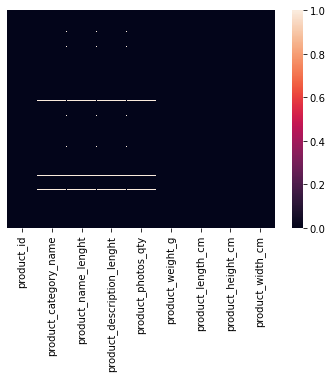

In [25]:
sns.heatmap(olist_products.isnull(), yticklabels=False)

#### Solution

In [26]:
## if all the columns don't contain values and want to omit them, then use the following source code
## olist_products2 = olist_products.dropna(how='all')

## else if only some values are missing in the column and you don't want to delete those rows, 
## you can use the following source code: 
## olist_products2 = olist_products.fillna(0)
## olist_products2.shape

## else if only some values are missing in the column and you want to fill those data with the values in the previous row (duplicates), 
## you can use the following source code :
olist_products2 = olist_products.fillna(method='ffill')
olist_products2.shape

## else if only some values are missing in the column and you want to fill those data with the values in the next row (duplicates), 
## you can use the following source code :
## olist_products2 = olist_products.fillna(method='bfill')

## you can use the following source code :
## olist_products2 = olist_products.interpolate()

## else if there is a missing value in the column and you want to remove that row, 
## then use the following source code:
## olist_products2 = olist_products.dropna()

(32951, 9)

In [27]:
olist_products2.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

### - olist_sellers_dataset

In [28]:
olist_sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


### - product_category_name_translation

In [29]:
product_category_name_translation.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


## 2. Data Integration

In [30]:
## pd.concat
## pd.merge
## pd.append

In [44]:
## Merge dataframe olist_orders2 with all Dataframe

result_olist_marged = olist_orders2.merge(olist_order_items, on='order_id', how='left')
result_olist_marged = result_olist_marged.merge(olist_order_payments, on='order_id', how='outer', validate='m:m')
result_olist_marged = result_olist_marged.merge(olist_order_reviews, on='order_id', how='outer')
result_olist_marged = result_olist_marged.merge(olist_products2, on='product_id', how='outer')
result_olist_marged = result_olist_marged.merge(olist_customers, on='customer_id', how='outer')
result_olist_marged = result_olist_marged.merge(olist_sellers, on='seller_id', how='outer')
result_olist_marged = result_olist_marged.merge(product_category_name_translation, on='product_category_name')

# remove duplicate order_id
result_olist_marged= result_olist_marged.drop_duplicates(subset='order_id')

result_olist_marged = result_olist_marged.dropna()
result_olist_marged.shape


(95795, 38)

In [45]:
result_olist_marged.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm   

In [33]:
result_olist_marged.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,9350.0,maua,SP,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366.0,sao paulo,SP,9350.0,maua,SP,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290.0,sao paulo,SP,9350.0,maua,SP,housewares
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,e781fdcc107d13d865fc7698711cc572,88032.0,florianopolis,SC,9350.0,maua,SP,housewares
6,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-25 14:17:55,2017-08-28 20:12:20,2017-09-14 00:00:00,2.0,be03d93320192443b8fa24c0ca6ead98,...,16.0,13.0,7a1de9bde89aedca8c5fbad489c5571c,1315.0,sao paulo,SP,9350.0,maua,SP,housewares


In [34]:
def table(df):
    print(f"Data Size: {df.shape}")
    outline = pd.DataFrame(df.dtypes,columns=['dtypes'])
    outline = outline.reset_index()
    outline['name'] = outline['index']
    outline = outline[['name','dtypes']]
    outline['missing_values'] = df.isnull().sum().values    
    outline['unique'] = df.nunique().values
    outline['first value'] = df.loc[0].values
    outline['second value'] = df.loc[3].values
    outline['thrid value'] = df.loc[4].values

    for name in outline['name'].value_counts().index:
        outline.loc[outline['name'] == name, 'Entropy(Impurity)'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return outline
table(result_olist_marged)

Data Size: (95795, 38)


,name,dtypes,missing_values,unique,first value,second value,thrid value,Entropy(Impurity)
0,order_id,object,0,95795,e481f51cbdc54678b7cc49136f2d6af7,128e10d95713541c87cd1a2e48201934,0e7e841ddf8f8f2de2bad69267ecfbcf,16.55
1,customer_id,object,0,95795,9ef432eb6251297304e76186b10a928d,a20e8105f23924cd00833fd87daa0831,26c7ac168e1433912a51b924fbd34d34,16.55
2,order_status,object,0,2,delivered,delivered,delivered,0.00
3,order_purchase_timestamp,object,0,95280,2017-10-02 10:56:33,2017-08-15 18:29:31,2017-08-02 18:24:47,16.54
4,order_approved_at,object,0,87711,2017-10-02 11:07:15,2017-08-15 20:05:16,2017-08-02 18:43:15,16.37
5,order_delivered_carrier_date,object,0,79586,2017-10-04 19:55:00,2017-08-17 15:28:33,2017-08-04 17:35:43,16.13
6,order_delivered_customer_date,object,0,94987,2017-10-10 21:25:13,2017-08-18 14:44:43,2017-08-07 18:30:01,16.53
7,order_estimated_delivery_date,object,0,444,2017-10-18 00:00:00,2017-08-28 00:00:00,2017-08-15 00:00:00,8.46
8,order_item_id,float64,0,7,1.0,1.0,1.0,0.12
9,product_id,object,0,30829,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,13.57


## 3. Visualisasi Data

### Price

C:\Users\arifw\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arifw\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


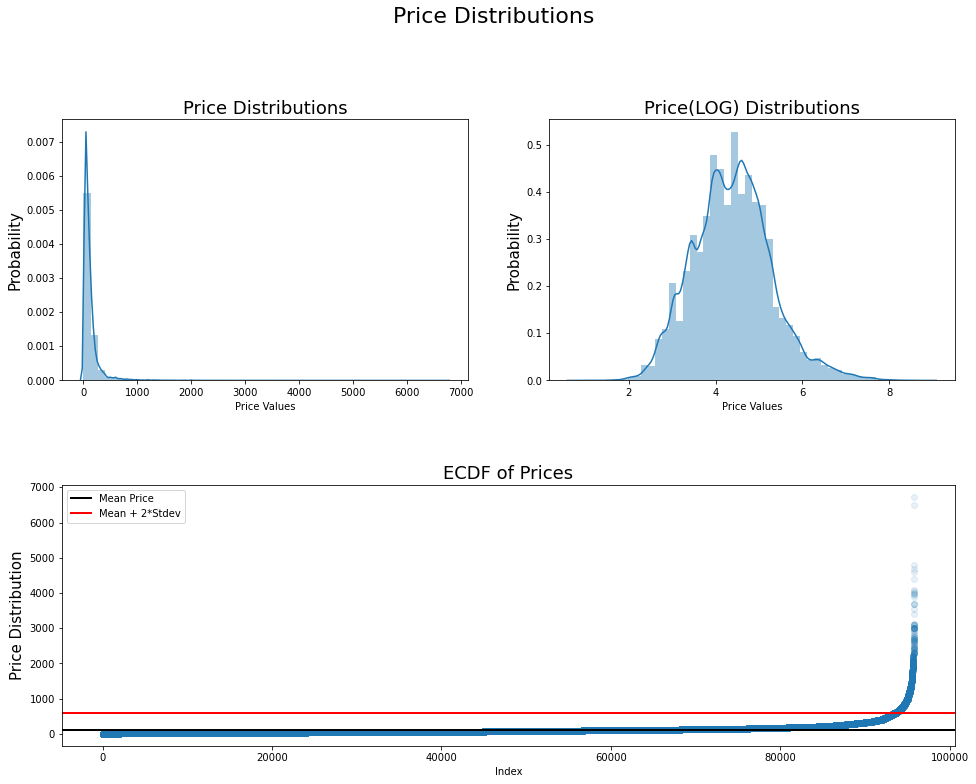

In [35]:
#Untuk mengetahui persebaran harga produk yang terjual
result_olist_marged['price'].fillna(-1, inplace=True)

plt.figure(figsize=(16,12))
plt.suptitle('Price Distributions', fontsize=22)
plt.subplot(221)
g = sns.distplot(result_olist_marged['price'])
g.set_title("Price Distributions", fontsize=18)
g.set_xlabel("Price Values")
g.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
g1 = sns.distplot(np.log(result_olist_marged['price']+1.5))
g1.set_title("Price(LOG) Distributions", fontsize=18)
g1.set_xlabel("Price Values")
g1.set_ylabel("Probability", fontsize=15)

plt.subplot(212)
g4 = plt.scatter(range(result_olist_marged.shape[0]),
                 np.sort(result_olist_marged['price'].values), 
                 alpha=.1)
g4= plt.title("ECDF of Prices", fontsize=18)
g4 = plt.xlabel("Index")
g4 = plt.ylabel("Price Distribution", fontsize=15)
g4 = plt.axhline(result_olist_marged[result_olist_marged['price'] != -1]['price'].mean(), color='black', 
           label='Mean Price', linewidth=2)
g4 = plt.axhline(result_olist_marged[result_olist_marged['price'] != -1]['price'].mean() + (2.5*result_olist_marged[result_olist_marged['price'] != -1]['price'].std()),
                 color='red', 
           label='Mean + 2*Stdev', linewidth=2)
g4 = plt.legend()

plt.subplots_adjust(hspace = 0.4, top = 0.85)

plt.show()

### Region

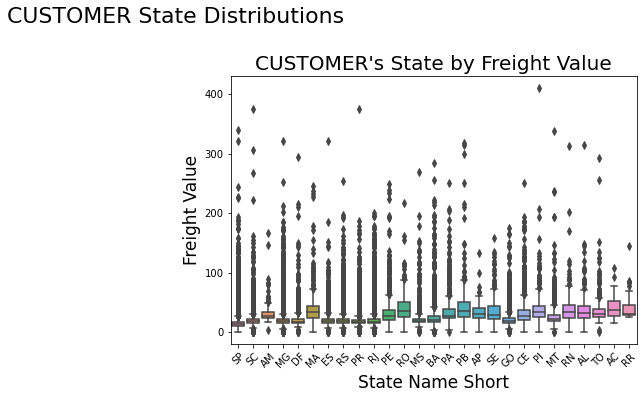

In [36]:
plt.figure(figsize=(16,12))

plt.suptitle('CUSTOMER State Distributions', fontsize=22)


plt.subplot(222)
g3 = sns.boxplot(x='customer_state', y='freight_value', 
                 data=result_olist_marged[result_olist_marged['price'] != -1])
g3.set_title("CUSTOMER's State by Freight Value", fontsize=20)
g3.set_xlabel("State Name Short", fontsize=17)
g3.set_ylabel("Freight Value", fontsize=17)
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

Berdasarkan grafik diketathui:
harga rata2 = 120.65
nilai stdev = 184.11
Sehingga nilai pengotor berada di angka di atas 580.92. Berdasarkan hal tersebut direkomendasikan untuk menjual barang di harga 12.65, dan menghindari menjual harga barang di sekitar 580.92

In [37]:
##Penggabungan Tabel
olist_customers = olist_customers.rename(columns={"customer_zip_code_prefix":"geolocation_zip_code_prefix"})
new_olist_customers= pd.merge(olist_customers, olist_geolocation, on="geolocation_zip_code_prefix", how="left")
new_olist_customers= new_olist_customers.drop_duplicates(subset ="customer_unique_id")
new_olist_customers = new_olist_customers.dropna( subset=["geolocation_lat"])
new_olist_customers = new_olist_customers.dropna( subset=["geolocation_lng"])
new_olist_customers= new_olist_customers.head(1000)

In [38]:
#Pembuatan Peta
def pembuatanPeta(default_location=[new_olist_customers.geolocation_lat.mean(), new_olist_customers.geolocation_lng.mean()],default_zoom_start=7):
  Peta= folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
  return  Peta
Peta = pembuatanPeta()
for index, info_lokasi in new_olist_customers.iterrows():
    folium.Marker([info_lokasi["geolocation_lat"], info_lokasi["geolocation_lng"]], popup=info_lokasi["customer_unique_id"]).add_to(Peta)
Peta    

###  Item yang terjual

### Payment


Payment untuk melihat :

1. Metode pembayaran yang sering digunakan
2. Persebaran harga tiap metode pembayaran

In [ ]:
# kendal, pearson, 
c = result_olist_customers_orders.corr(method = "pearson")
c_sorted = c.sort_values( by=['price'], ascending = False )
c_sorted["price"]

In [ ]:
sns.set_style("whitegrid")

c_sorted["price"].plot (kind = "bar")
plt.title("Correlation Between Price With All Variables")
plt.xlabel("Variables")
plt.ylabel("Pearson Correlation")